In [1]:
import matplotlib.pyplot as plt

from mpl_toolkits.axes_grid1 import make_axes_locatable
from plot_utils import *

%matplotlib inline

In [2]:
figure6d = h5py.File('figure6d.h5', 'r')['results'][:]
figure6e = h5py.File('figure6e.h5', 'r')['max_ks'][:]
figure6f = h5py.File('figure6f.h5', 'r')['results'][:]

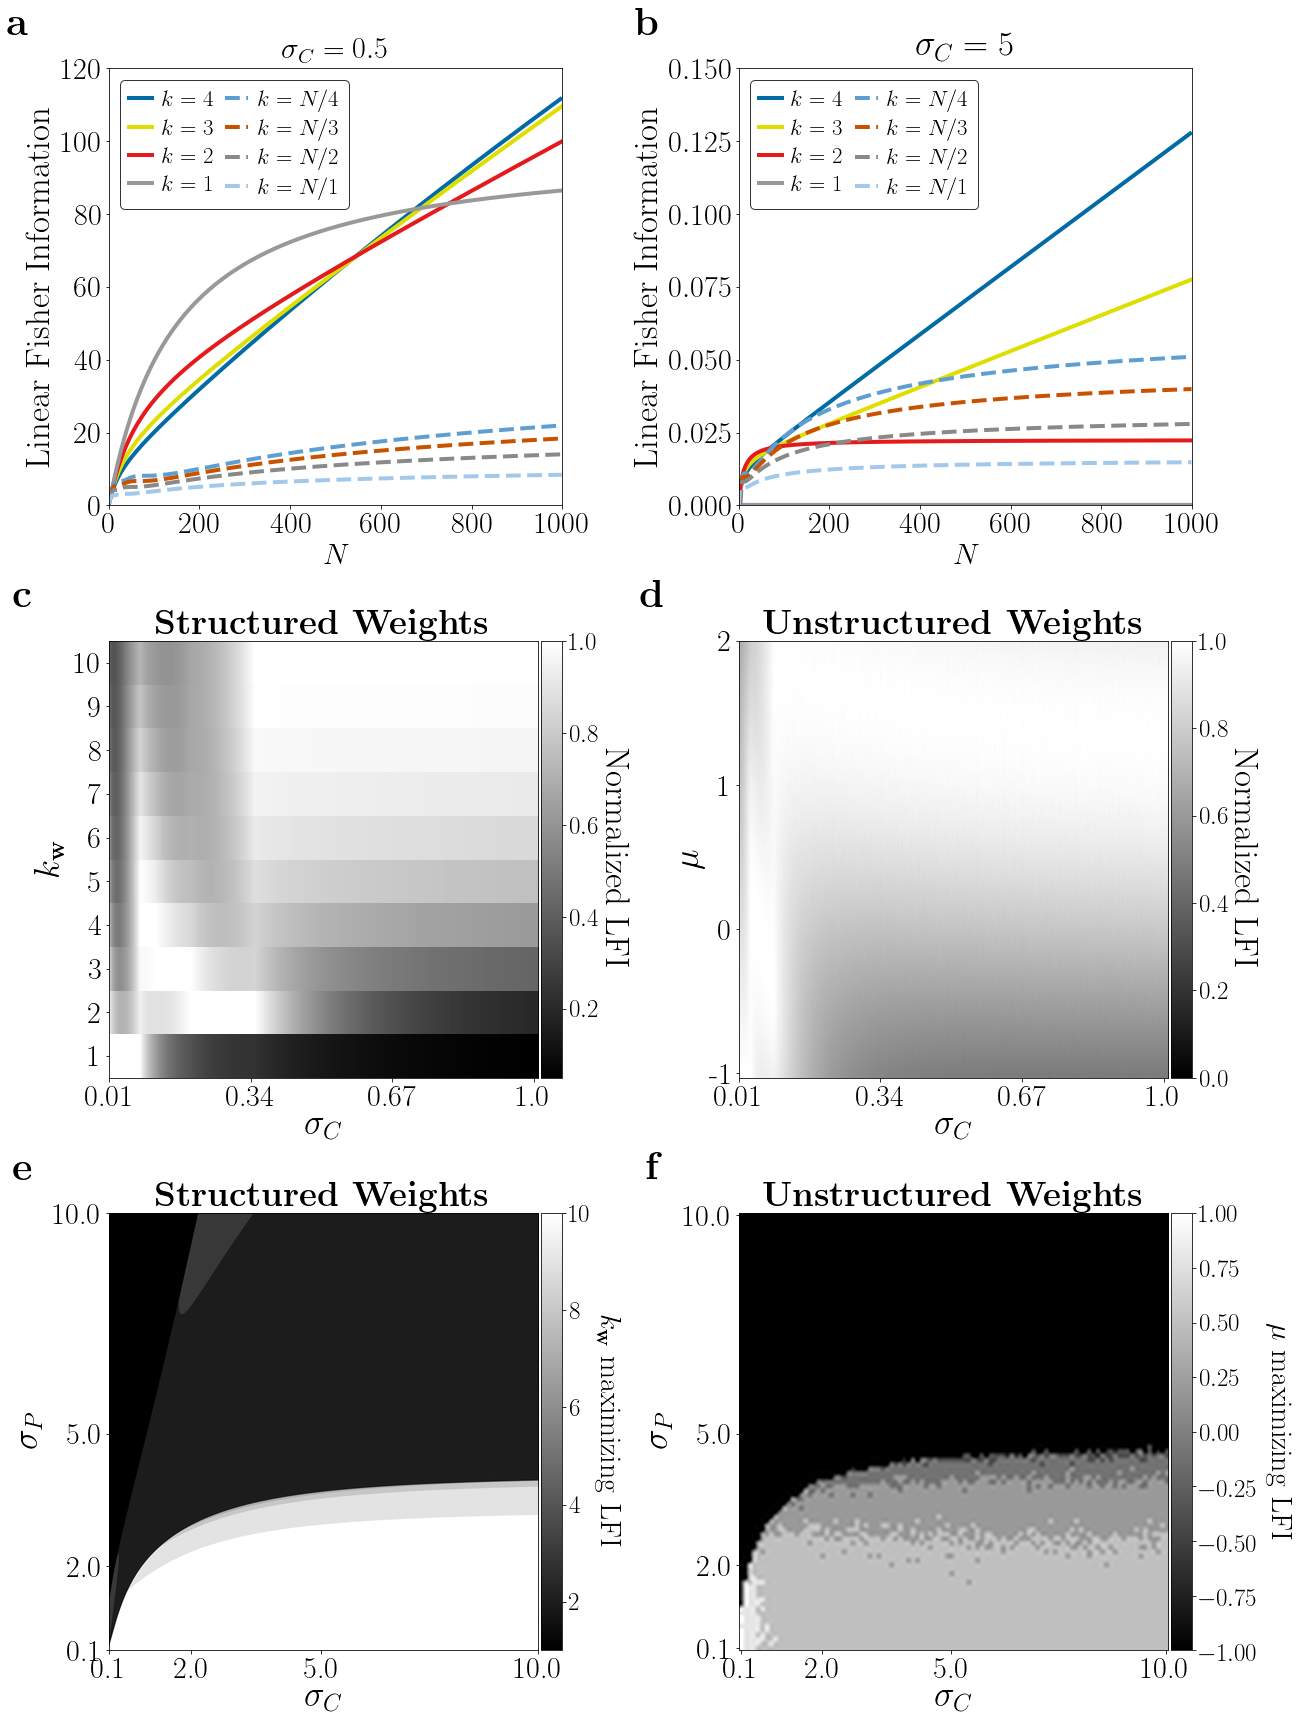

In [3]:
fig, axes = plt.subplots(3, 2, figsize=(18,24))

# Figure 6A
struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4,3,2,1]),
    version=1,
    fax=(fig, axes[0, 0]),
    sigmaC=0.1,
    colors=['#006BA4', '#999999', '#e41a1c', '#dede00'])

struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4,3,2,1]),
    version=2,
    fax=(fig, axes[0, 0]),
    linestyle='--',
    sigmaC=0.1,
    colors=['#5F9ED1', '#C85200', '#898989', '#A2C8EC'])

axes[0, 0].set_xlim([0, 1000])
axes[0, 0].set_ylim([0, 120])
axes[0, 0].set_ylabel('Linear Fisher Information', fontsize=35)
axes[0, 0].set_title(r'$\sigma_C=0.5$', fontsize=30)
axes[0, 0].tick_params(labelsize=30)

# Figure 6B
struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4,3,2,1]),
    version=1,
    fax=(fig, axes[0, 1]),
    sigmaC=10.,
    colors=['#006BA4', '#999999', '#e41a1c', '#dede00'])

struct_weight_plot_nonlinear_N(
    N_max=1000,
    ks=np.array([4,3,2,1]),
    version=2,
    fax=(fig, axes[0, 1]),
    linestyle='--',
    sigmaC=10.,
    colors=['#5F9ED1', '#C85200', '#898989', '#A2C8EC'])

axes[0, 1].set_xlim([0, 1000])
axes[0, 1].set_ylim([0, 0.15])
axes[0, 1].set_ylabel('Linear Fisher Information', fontsize=35)
axes[0, 1].set_title(r'$\sigma_C=5$', fontsize=35)
axes[0, 1].tick_params(labelsize=30)

# Figure 6C
ratios = np.linspace(0.01, 1, 1000)
ks = np.arange(1, 11)
img = plot_fisher_nonlinear_2d_alt(
    N=1000,
    ratios=ratios,
    ks=ks,
    s=1,
    version=1,
    fax=(fig, axes[1,0]))

axes[1, 0].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[1, 0].set_yticklabels(np.arange(1, 11))
axes[1, 0].set_xticks(ratios.size * np.array([0, 0.33, 0.66, 0.99]))
axes[1, 0].set_xticklabels([0.01, 0.34, 0.67, 1.0])
axes[1, 0].tick_params(labelsize=30)
axes[1, 0].set_xlabel(r'$\sigma_C$', fontsize=35)
axes[1, 0].set_ylabel(r'$k_{\mathbf{w}}$', fontsize=35)
axes[1, 0].set_aspect('auto')
divider = make_axes_locatable(axes[1, 0])
axes[1, 0].set_title(r'\textbf{Structured Weights}', fontsize=35)
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'Normalized LFI', fontsize=35, rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=25) 

# Figure 6D
ratios = np.linspace(0.01, 1, 1000)
mus=np.linspace(-1, 1, 50)
img4d = axes[1, 1].imshow(
    figure6d.T,
    vmin=0, vmax=1,
    interpolation='spline36')

axes[1, 1].set_xlabel(r'$\sigma_C$', fontsize=35)
axes[1, 1].set_ylabel(r'$\mu$', fontsize=35)
axes[1, 1].set_title(r'\textbf{Unstructured Weights}', fontsize=35)
axes[1, 1].tick_params(labelsize=30)
axes[1, 1].set_yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
axes[1, 1].set_yticklabels(np.arange(1, 11))
axes[1, 1].set_yticks(mus.size * np.array([0, 0.33, 0.66, 0.99]))
axes[1, 1].set_yticklabels([-1, 0, 1, 2])
axes[1, 1].set_xticks(ratios.size * np.array([0, 0.33, 0.66, 0.99]))
axes[1, 1].set_xticklabels([0.01, 0.34, 0.67, 1.0])
# handle colorbar
axes[1, 1].set_aspect('auto')
divider = make_axes_locatable(axes[1, 1])
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img4d, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'Normalized LFI', fontsize=35, rotation=270, labelpad=30)
cb.ax.tick_params(labelsize=25) 

# Figure 6E
sigmaPs = np.linspace(0.1, 10, 5000)
sigmaCs = np.linspace(0.1, 10, 5000)
img4e = axes[2, 0].imshow(
    figure6e,
    vmin=1, vmax=10,
    interpolation='spline36')

# handle ticks and labels
ticks_labels = np.array([0.1, 2.0, 5.0, 10])
ticks = [
    min(range(len(sigmaPs)), key=lambda i: abs(sigmaPs[i]-label))
    for label in ticks_labels]
axes[2, 0].set_xticks(ticks)
axes[2, 0].set_xticklabels(ticks_labels)
axes[2, 0].set_yticks(ticks)
axes[2, 0].set_yticklabels(ticks_labels)
# axes labels
axes[2, 0].set_xlabel(r'$\sigma_C$', fontsize=35)
axes[2, 0].set_ylabel(r'$\sigma_P$', fontsize=35)
axes[2, 0].set_title(r'\textbf{Structured Weights}', fontsize=35)
axes[2, 0].tick_params(labelsize=30)
# handle colorbar
axes[2, 0].set_aspect('auto')
divider = make_axes_locatable(axes[2, 0])
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img4e, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'$k_{\mathbf{w}}$ maximizing LFI', fontsize=30, rotation=270, labelpad=25)
cb.ax.tick_params(labelsize=25) 

# Figure 6F
sigmaPs = np.linspace(0.1, 10, 100)
sigmaCs = np.linspace(0.1, 10, 100)
img4f = axes[2,1].imshow(
    figure6f,
    interpolation='spline36',
    vmin=-1, vmax=1)

# handle ticks and labels
ticks_labels = np.array([0.1, 2.0, 5.0, 10])
ticks = [
    min(range(len(sigmaPs)), key=lambda i: abs(sigmaPs[i]-label))
    for label in ticks_labels]
axes[2, 1].set_xticks(ticks)
axes[2, 1].set_xticklabels(ticks_labels)
axes[2, 1].set_yticks(ticks)
axes[2, 1].set_yticklabels(ticks_labels)
# axes labels
axes[2, 1].set_xlabel(r'$\sigma_C$', fontsize=35)
axes[2, 1].set_ylabel(r'$\sigma_P$', fontsize=35)
axes[2, 1].set_title(r'\textbf{Unstructured Weights}', fontsize=35)
axes[2, 1].tick_params(labelsize=30)
# handle colorbar
axes[2, 1].set_aspect('auto')
divider = make_axes_locatable(axes[2, 1])
cax = divider.append_axes("right", size="5%", pad=0.04)
cb = plt.colorbar(img4f, fraction=0.046, pad=0.04, cax=cax)
cb.ax.set_ylabel(r'$\mu$ maximizing LFI', fontsize=30, rotation=270, labelpad=33)
cb.ax.tick_params(labelsize=25) 

# Subplot labels
axes[0, 0].text(
    x=-0.2, y=1.1, s=r'\textbf{a}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 0].transAxes)

axes[0, 1].text(
    x=-0.2, y=1.1, s=r'\textbf{b}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[0, 1].transAxes)

axes[1, 0].text(
    x=-0.2, y=1.1, s=r'\textbf{c}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 0].transAxes)

axes[1, 1].text(
    x=-0.2, y=1.1, s=r'\textbf{d}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[1, 1].transAxes)

axes[2, 0].text(
    x=-0.2, y=1.1, s=r'\textbf{e}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[2, 0].transAxes)

axes[2, 1].text(
    x=-0.2, y=1.1, s=r'\textbf{f}',
    fontsize=40,
    horizontalalignment='center',
    verticalalignment='center',
    transform=axes[2, 1].transAxes)

plt.tight_layout()
# plt.savefig('figure6.pdf', bbox_inches='tight')